In [1]:
import numpy as np
from numpy.random import randn
from numpy.linalg import pinv

import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

plt.rcParams['font.size'] = 18

In [2]:
# Matrix of possible predictors
A = randn(100, 10)

# Two nonzero predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0], dtype=float)

# Observations with noise
b = A @ x + 2*randn(100)

# Find optimal value of alpha for Lasso using GridCV
alphas = np.logspace(-4, -0.1, 100)
clf = GridSearchCV(
    Lasso(random_state=0),
    param_grid=dict(alpha=alphas), cv=10, refit=False
).fit(A, b)

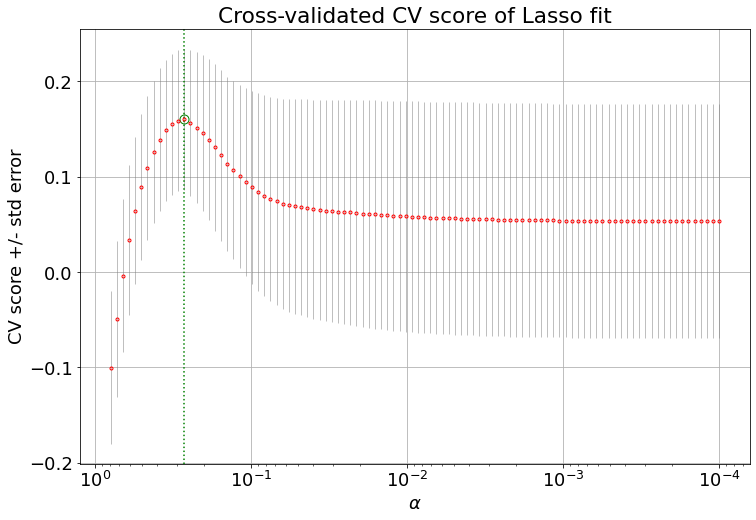

In [3]:
# Figure 3.13 (NB inverted as CV score rather than error)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(10)
alpha_at_max_score = alphas[np.argmax(scores)]
max_score = np.max(scores)

fig, ax = plt.subplots(figsize=(12, 8))

ax.errorbar(
    alphas, scores, std_error,
    fmt='o', color='red', markerfacecolor='none', markersize=3,
    ecolor='gray', elinewidth=0.5
)
ax.set_xscale('log')
ax.invert_xaxis()

ax.plot(alpha_at_max_score, max_score, 'o', markersize=9, color='green', markerfacecolor='none')
ax.axvline(alpha_at_max_score, linestyle=':', color='green')

ax.set_title('Cross-validated CV score of Lasso fit')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('CV score +/- std error')
ax.grid(True);

In [4]:
x_l2 = pinv(A) @ b

x_l1 = Lasso(random_state=0, alpha=clf.best_params_['alpha']).fit(A, b).coef_
x_l1_debiased = pinv(A[:, abs(x_l1)>0.01]) @ b

with np.printoptions(precision=3, floatmode='fixed'):
    print('x     :', x)
    print('x_l2  :', x_l2)
    print('x_l1  :', x_l1)
    print('x_l1db:', x_l1_debiased)

x     : [ 0.000  0.000  1.000  0.000  0.000  0.000 -1.000  0.000  0.000  0.000]
x_l2  : [ 0.092 -0.150  1.019 -0.250  0.121  0.146 -1.053 -0.175 -0.078 -0.230]
x_l1  : [ 0.000 -0.000  0.718 -0.000  0.000  0.000 -0.791 -0.000 -0.000 -0.000]
x_l1db: [ 0.980 -1.083]
